In [82]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [83]:
## load the dataset
dataset = pd.read_csv('../02_pollution_prediction/AirQualityUCI.csv')
dataset.head()

,Date,Time,CO_GT,PT08_S1_CO,NMHC_GT,C6H6_GT,PT08_S2_NMHC,Nox_GT,PT08_S3_Nox,NO2_GT,PT08_S4_NO2,PT08_S5_O3,T,RH,AH,CO_level
0,11/23/2004,19:00:00,11.9,2008,-200,50.6,1980,1389,325,220,2562,2342,12.4,74.7,1.0741,Very High
1,11/23/2004,20:00:00,11.5,1918,-200,49.4,1958,1358,335,190,2477,2237,11.5,76.2,1.0324,Very High
2,11/17/2004,18:00:00,10.2,1802,-200,47.7,1924,748,356,192,2235,2452,13.7,52.8,0.8244,Very High
3,11/23/2004,18:00:00,10.2,1982,-200,49.5,1959,1369,322,227,2536,2386,13.2,72.6,1.0936,Very High
4,11/26/2004,18:00:00,10.1,1956,-200,45.2,1877,1389,347,255,2338,2465,15.5,62.8,1.0979,Very High


In [84]:
## dataset characteristics
print("Dataset shape : ",dataset.shape)
print("Dataset description : ",dataset.describe())
print("Dataset information : ",dataset.info())

Dataset shape :  (9357, 16)
Dataset description :               CO_GT   PT08_S1_CO      NMHC_GT      C6H6_GT  PT08_S2_NMHC  \
count  9357.000000  9357.000000  9357.000000  9357.000000   9357.000000   
mean    -34.207524  1048.990061  -159.090093     1.865683    894.595276   
std      77.657170   329.832710   139.789093    41.380206    342.333252   
min    -200.000000  -200.000000  -200.000000  -200.000000   -200.000000   
25%       0.600000   921.000000  -200.000000     4.000000    711.000000   
50%       1.500000  1053.000000  -200.000000     7.900000    895.000000   
75%       2.600000  1221.000000  -200.000000    13.600000   1105.000000   
max      11.900000  2040.000000  1189.000000    63.700000   2214.000000   

            Nox_GT  PT08_S3_Nox       NO2_GT  PT08_S4_NO2   PT08_S5_O3  \
count  9357.000000  9357.000000  9357.000000  9357.000000  9357.000000   
mean    168.616971   794.990168    58.148873  1391.479641   975.072032   
std     257.433866   321.993552   126.940455   467.

In [85]:
## dataset variables
print(dataset.columns)

Index(['Date', 'Time', 'CO_GT', 'PT08_S1_CO', 'NMHC_GT', 'C6H6_GT',
       'PT08_S2_NMHC', 'Nox_GT', 'PT08_S3_Nox', 'NO2_GT', 'PT08_S4_NO2',
       'PT08_S5_O3', 'T', 'RH', 'AH', 'CO_level'],
      dtype='object')


In [86]:
## identify null values
## no null values are present
print(dataset.isnull().sum())

Date            0
Time            0
CO_GT           0
PT08_S1_CO      0
NMHC_GT         0
C6H6_GT         0
PT08_S2_NMHC    0
Nox_GT          0
PT08_S3_Nox     0
NO2_GT          0
PT08_S4_NO2     0
PT08_S5_O3      0
T               0
RH              0
AH              0
CO_level        0
dtype: int64


In [87]:
# date time modification
dataset['Date'] = pd.to_datetime(dataset['Date']+' '+dataset['Time'], errors='coerce')
dataset.drop(['Time'], axis=1, inplace=True)

In [88]:
# split the dataset
X = dataset.drop('CO_level',axis=1)
y = dataset[['Date','CO_level']]

print('Independent Features : ',X.head())
print('Dependent Features : ',y.head())
print(X.columns)

Independent Features :                   Date  CO_GT  PT08_S1_CO  NMHC_GT  C6H6_GT  PT08_S2_NMHC  \
0 2004-11-23 19:00:00   11.9        2008     -200     50.6          1980   
1 2004-11-23 20:00:00   11.5        1918     -200     49.4          1958   
2 2004-11-17 18:00:00   10.2        1802     -200     47.7          1924   
3 2004-11-23 18:00:00   10.2        1982     -200     49.5          1959   
4 2004-11-26 18:00:00   10.1        1956     -200     45.2          1877   

   Nox_GT  PT08_S3_Nox  NO2_GT  PT08_S4_NO2  PT08_S5_O3     T    RH      AH  
0    1389          325     220         2562        2342  12.4  74.7  1.0741  
1    1358          335     190         2477        2237  11.5  76.2  1.0324  
2     748          356     192         2235        2452  13.7  52.8  0.8244  
3    1369          322     227         2536        2386  13.2  72.6  1.0936  
4    1389          347     255         2338        2465  15.5  62.8  1.0979  
Dependent Features :                   Date   CO_le

In [89]:
X = X.set_index('Date')
print(X.index)
y=y.set_index('Date')
print(y.index)

DatetimeIndex(['2004-11-23 19:00:00', '2004-11-23 20:00:00',
               '2004-11-17 18:00:00', '2004-11-23 18:00:00',
               '2004-11-26 18:00:00', '2004-12-13 18:00:00',
               '2004-10-26 18:00:00', '2004-12-02 19:00:00',
               '2004-12-14 18:00:00', '2004-11-02 20:00:00',
               ...
               '2005-03-13 07:00:00', '2005-03-13 08:00:00',
               '2005-03-14 04:00:00', '2005-03-17 04:00:00',
               '2005-03-20 04:00:00', '2005-03-23 04:00:00',
               '2005-03-26 04:00:00', '2005-03-29 04:00:00',
               '2005-04-01 04:00:00', '2005-04-04 04:00:00'],
              dtype='datetime64[ns]', name='Date', length=9357, freq=None)
DatetimeIndex(['2004-11-23 19:00:00', '2004-11-23 20:00:00',
               '2004-11-17 18:00:00', '2004-11-23 18:00:00',
               '2004-11-26 18:00:00', '2004-12-13 18:00:00',
               '2004-10-26 18:00:00', '2004-12-02 19:00:00',
               '2004-12-14 18:00:00', '2004-11-02 2

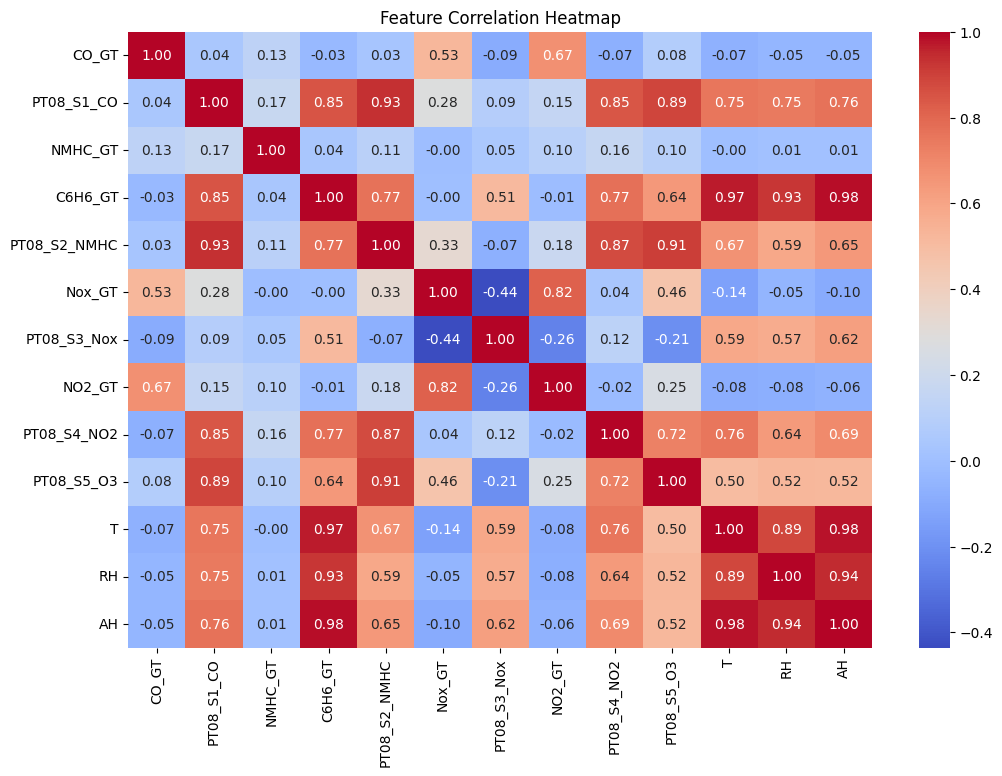

In [90]:
# feature correlation
corr = X.corr()
# Plot heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Feature Correlation Heatmap")
plt.show()

C:\Users\ashis\AppData\Local\Temp\ipykernel_18580\1075669389.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly = X.resample('M').mean()


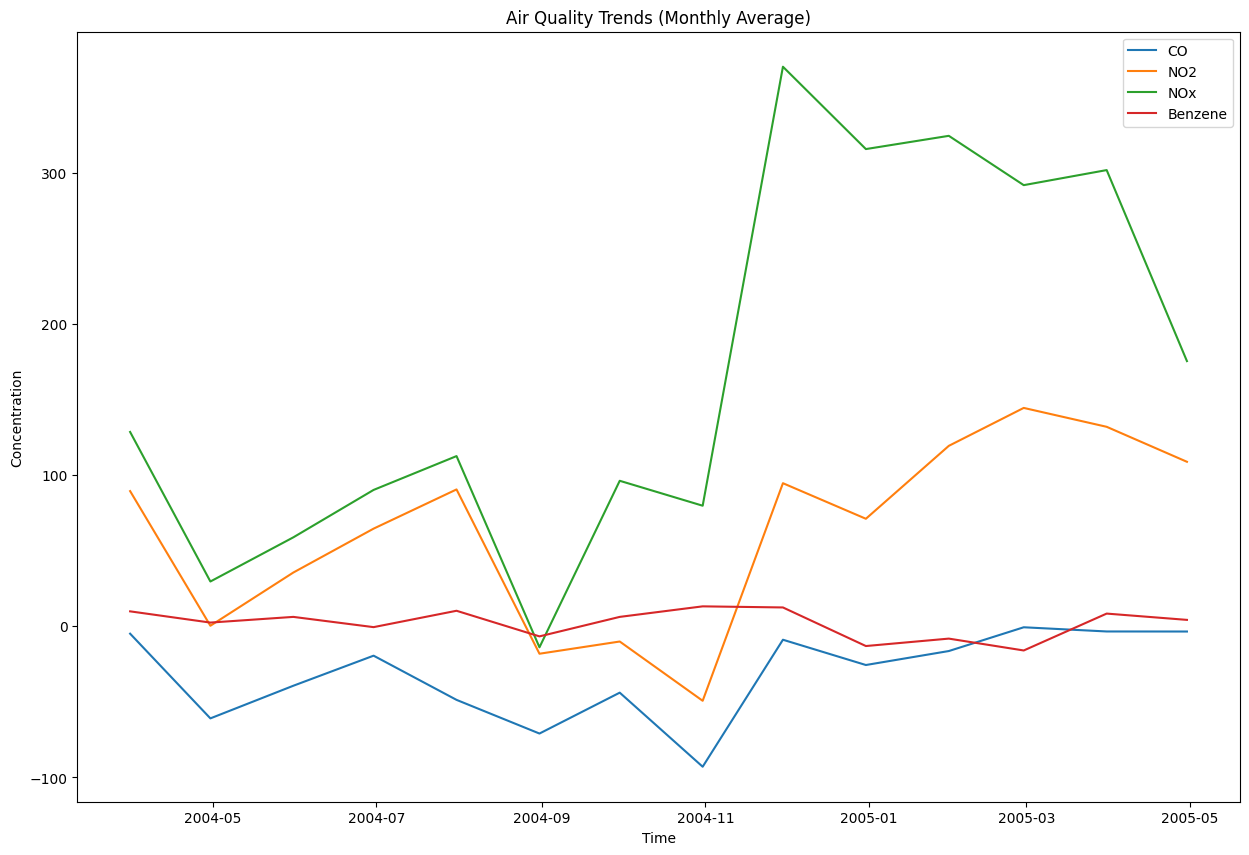

In [94]:
monthly = X.resample('M').mean()

plt.figure(figsize=(15,10))
plt.plot(monthly.index, monthly['CO_GT'], label='CO')
plt.plot(monthly.index, monthly['NO2_GT'], label='NO2')
plt.plot(monthly.index, monthly['Nox_GT'], label='NOx')
plt.plot(monthly.index, monthly['C6H6_GT'], label='Benzene')
plt.title("Air Quality Trends (Monthly Average)")
plt.xlabel("Time")
plt.ylabel("Concentration")
plt.legend()
plt.show()

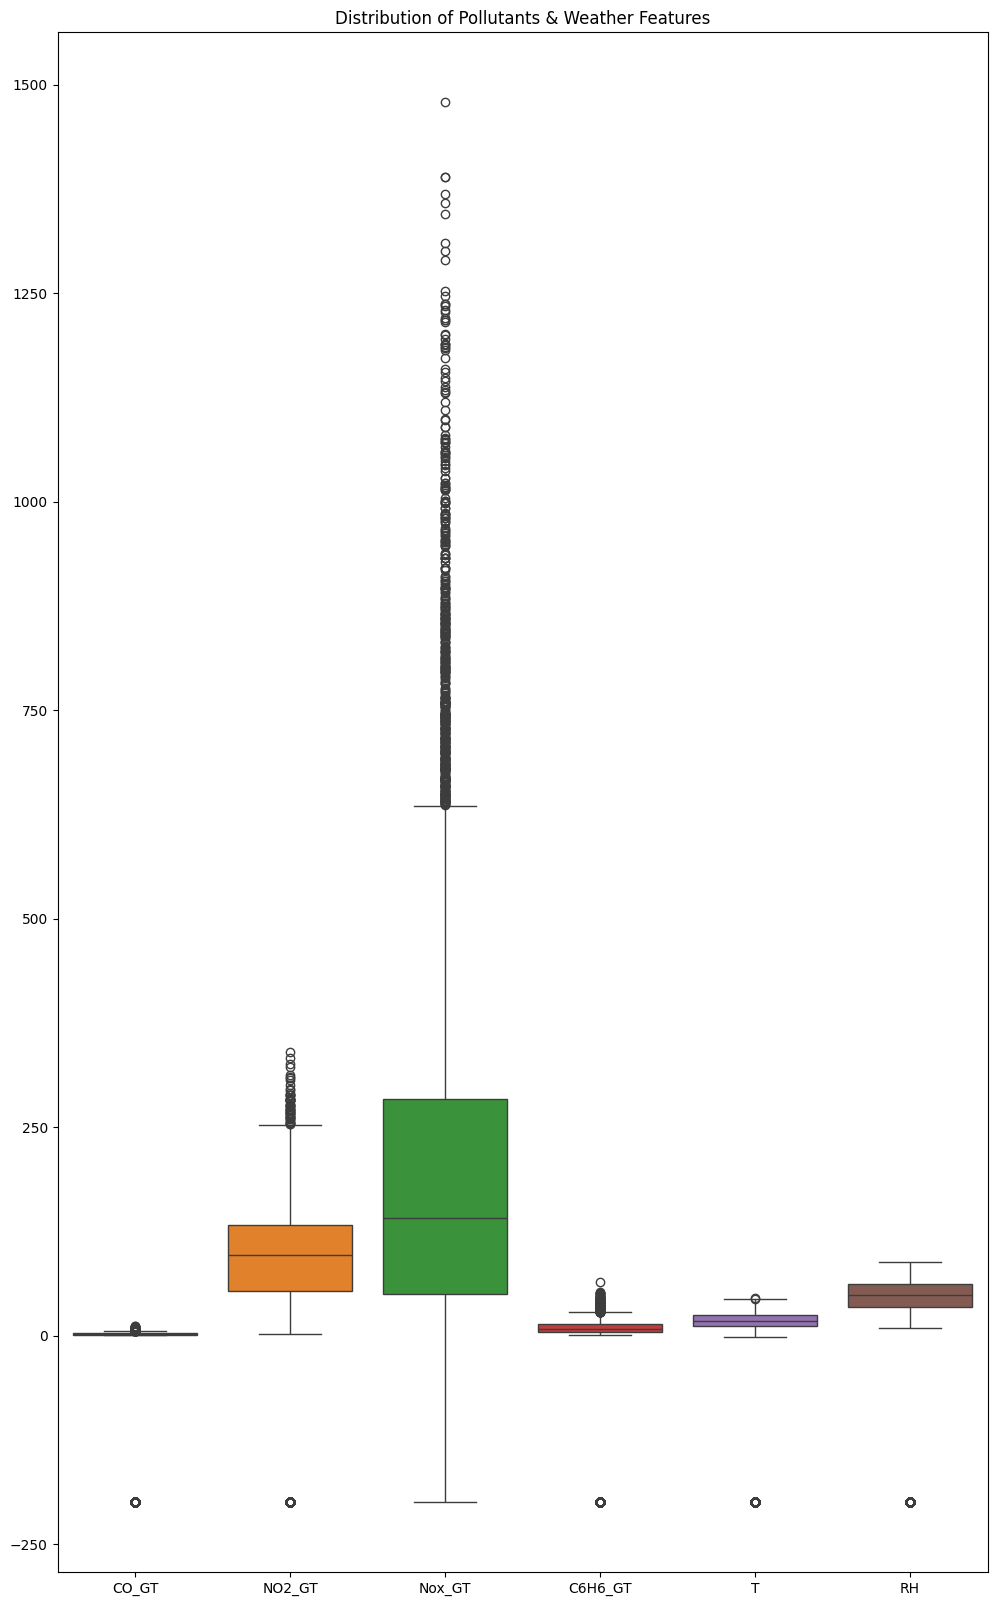

In [97]:
plt.figure(figsize=(12,20))
sns.boxplot(data=X[['CO_GT','NO2_GT','Nox_GT','C6H6_GT','T','RH']])
plt.title("Distribution of Pollutants & Weather Features")
plt.show()